# Research Skills: Image Analysis
## Worksheet 2 : Image Enhancement in the Spatial Domain 

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

In the session, we will learn
* Point Operations
    * intensity thresholding  
    * image histograms    
    * contrast adjustment techniques
* Spatial ﬁltering 
    * smoothing filters (e.g averaging, Gaussian, median ﬁlters) 
    * edge detection filters
    * sharpening filters 

# Entry Level 
# 1. Intensity Thresholding 
Thresholding involves selecting a threshold value T, which separates the light objects from the dark background or vice versa. We need to choose a threshold value T that properly separates light objects from the dark background. First we convert the intensity values of the image to a range between 0 and 1. In this example, we select the threshold, T, to be 0.4. Try:

In [1]:
# !pip install scikit-image

In [2]:
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu
import numpy as np 

(-0.5, 255.5, 255.5, -0.5)

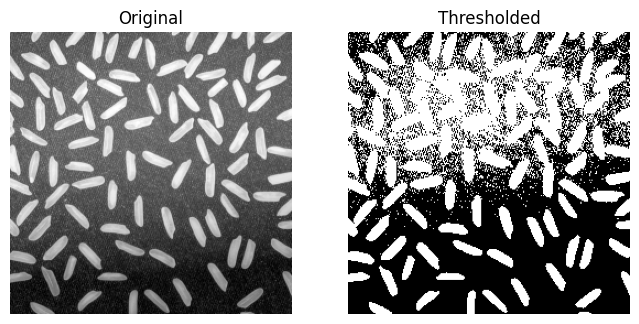

In [3]:
# read image from disk, provide the correct path 
im = io.imread('images/rice.png')  
# convert to float
im = im.astype(float)   #!!!!!             
# normarlize the intensity values a range between 0 and 1 #!!!!!
im = im-im.min()                    
im = im/im.max()

# threshold the image 
imbw = im > 0.4 #set the threshold manually

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(im, cmap=plt.cm.gray) #
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(imbw, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

In [6]:
# what type are the entries in the new image?
print(imbw.dtype) #binary image -> bool

bool


Otsu thresholding automatically computes an optimal threshold value from the data. Apply Otsu thresholding `thresh = threshold_otsu(im)` and display the results.  

0.556640625


(-0.5, 255.5, 255.5, -0.5)

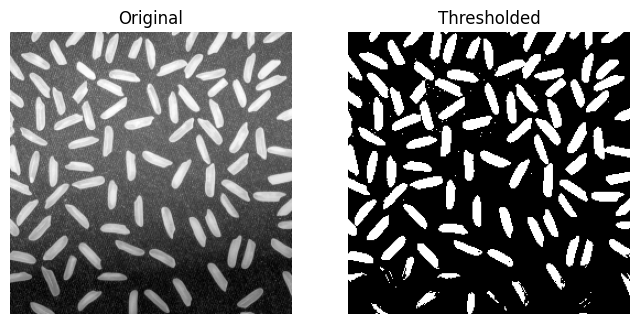

In [9]:
threshold = threshold_otsu(im)
print(threshold)

imbw = im > threshold

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(im, cmap=plt.cm.gray) #
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(imbw, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

There are different thresholding methods. The following function (try_all_thresholds) returns a figure comparing the outputs of different thresholding methods.

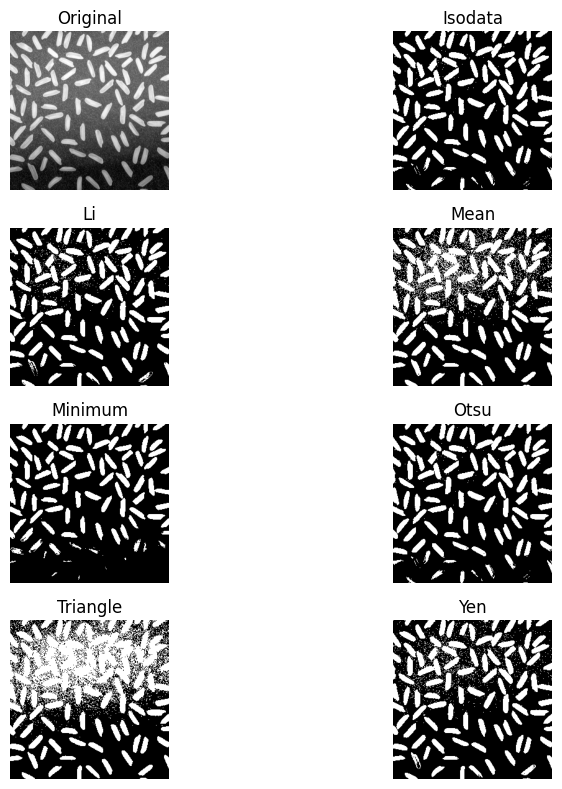

In [10]:
# try all thresholds 
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(im, figsize=(10, 8), verbose=False)
plt.show()

There is some variation in the background intensity in the image. Hence, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. Here, we binarize an image using the `threshold_local` function, which calculates thresholds in regions of size `block_size` surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an offset value. The following code implements adaptive thresholding. 

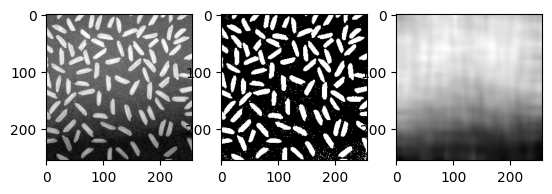

In [22]:
from skimage import filters

# set the blocksize for local thresholding algorithms.
block_size = 55 # sliding window of 55*55
# filters.threshold_local creates a numpy array with the same height and width of im
# each pixel in im is threshold
imbw = im > filters.threshold_local(im, block_size,method = 'mean')
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imbw, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(filters.threshold_local(im, block_size,method = 'mean'), cmap='gray')

Try reducing the block_size to a much smaller value (e.g 11). What do you see? 

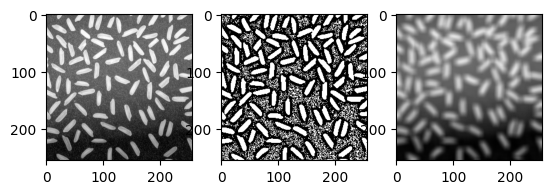

In [21]:
block_size = 11
# filters.threshold_local creates a numpy array with the same height and width of im
# each pixel in im is threshold
imbw = im > filters.threshold_local(im, block_size,method = 'mean')
plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imbw, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(filters.threshold_local(im, block_size,method = 'mean'), cmap='gray')
# more foreground was picked up as noise

# 2. Image Histograms
We can check the distribution of grayscale intensity values in an entire image with image histograms. For example, we can estimate background values, determining thresholds, and visualize the effect of contrast adjustments on the image. The following code displays intensity histograms. 

This means that the original data values, will be assigned to a bin into wich they fit according to their size. The original values will be replaced by values representing the corresponding intervals. The function `plt.hist` allows you to specify the number of bins to quantize the data. Binning is a form of quantization. The following code loads an image and displays the intensity histogram with a blue `facecolor` and a transparency value of (`alpha = 0.5`). 
1. Reduce the number of bins to 10 and increase the value of alpha to 0.8. 
2. Load a color image  (eg. im3 = io.imread("images/4.1.05.tiff")) 
3. Using subplots, display the image in one plot (figure) and its 3 image histograms (one of each channel). Change the facecolor of first image histogram to red (facecolor='r'), the second one to green and the third one to blue. 

(256, 256)


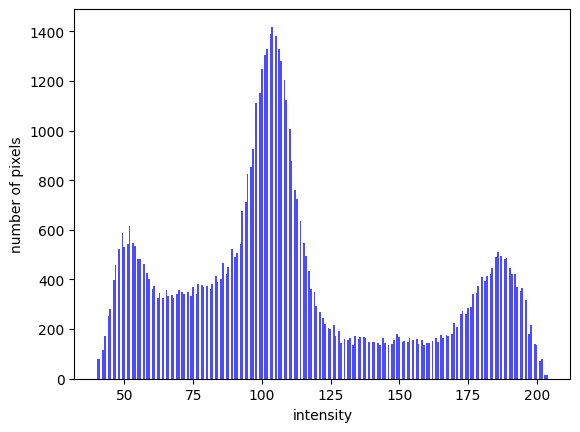

In [23]:
from skimage.exposure import histogram 
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline


im = io.imread('images/rice.png')      # read image from disk, provide the correct path 
print(im.shape)

# display the intensity histogram with 256 separate intensity levels with a 0.5 transparency value
# for each row one image -> use .ravel() function

plt.figure()
n, bins, patches = plt.hist(im.ravel(), bins=256, facecolor='blue', alpha=0.7) 
plt.xlabel('intensity')
plt.ylabel('number of pixels')
plt.show()

In [30]:
#color image
im_color = io.imread('images/4.1.05.tiff') 
print(im_color.shape)

im_color_r = im_color[:, :, 0]
im_color_g = im_color[:, :, 1]
im_color_b = im_color[:, :, 2]

(256, 256, 3)


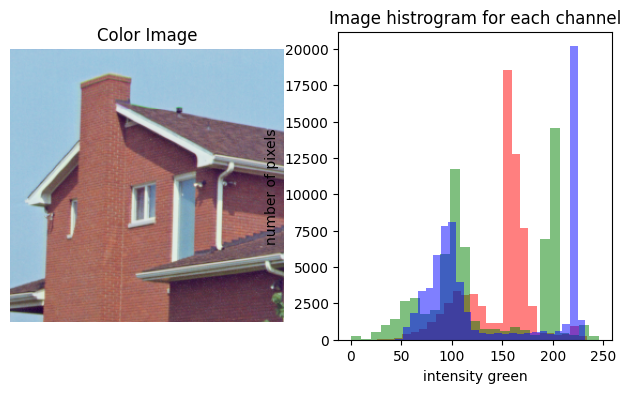

In [94]:
# red
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(im_color)
plt.title('Color Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Image histrogram for each channel')
n, bins, patches = plt.hist(im_color_r.ravel(), bins=25, facecolor='red', alpha=0.5) 
n, bins, patches = plt.hist(im_color_g.ravel(), bins=25, facecolor='green', alpha=0.5) 
n, bins, patches = plt.hist(im_color_b.ravel(), bins=25, facecolor='blue', alpha=0.5) 
plt.xlabel('intensity green')
plt.ylabel('number of pixels')
plt.show()

# 3. Contrast Adjustments 
Different intensity transformations that will improve the appearance of the images. During contrast adjustment, the intensity value of each pixel in the raw image is transformed using a transfer function to form a contrast-adjusted image. These intensity transformations include 
* Image negatives
* Color space transformation
* Log transform
* Power-law transformation
* Contrast stretching

## 3.1 Gamma and Log Transformations 
The following code implements logarithimic and gamma functions directly or by calling functions in skimage. Here we select a gain of 10 and a gamma of 2. 
1. Display the original image (`im`) and the log and gamma transformations
2. Verify that the transform via the equations and using the built in functions return the same image
3. Change the value of gamma to 0.5. What do you see? 

(-0.5, 255.5, 255.5, -0.5)

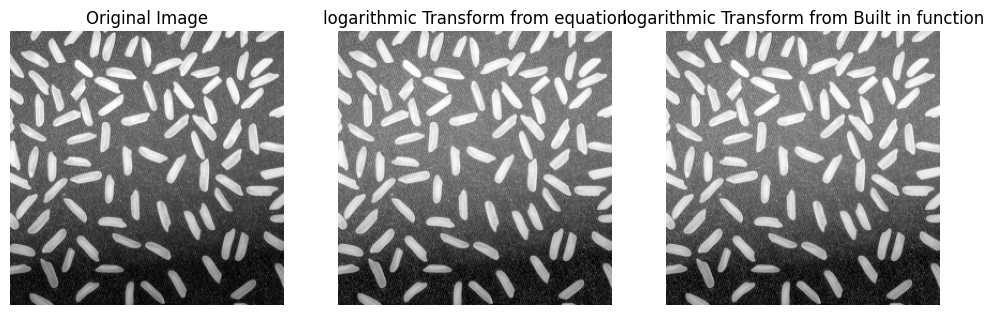

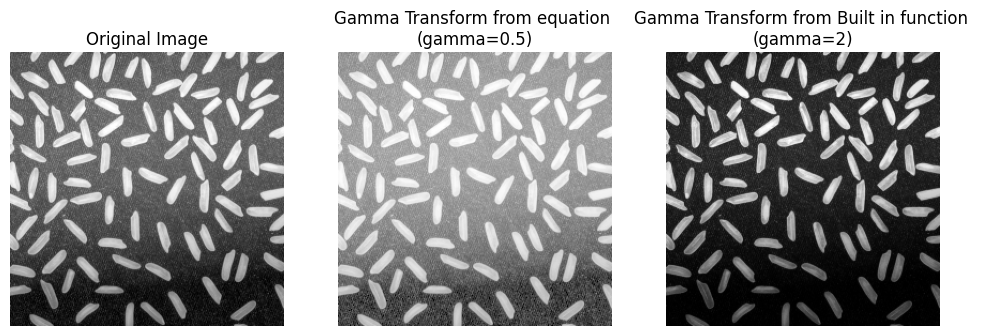

In [72]:
from skimage import exposure
from skimage import io, color
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

im = io.imread('images/rice.png')     # read image from disk, provide the correct path 

# convert to float64 and scale the image to between 0 and 1 
im = im.astype(float)
im = im-im.min()
im = im/im.max()

# equation for logarithmic transform
c = 10; #gain
gm = 2; #gamma #TODO change to 0.5
im_log1 = c*np.log(1+im);

# function for logarithmic transform
im_log2 = exposure.adjust_log(im, c)

# equation for gamma transform
# im_gamma1 = c*im**2;
im_gamma1 = c*im**0.5

# function for gamma transform
im_gamma2 = exposure.adjust_gamma(im, gm,c) 

plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(im_log1, cmap='gray')
plt.title('logarithmic Transform from equation')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(im_log2, cmap='gray')
plt.title('logarithmic Transform from Built in function')
plt.axis('off')

plt.figure(figsize=(12,9))
plt.subplot(2,3,1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(im_gamma1, cmap='gray')
plt.title('Gamma Transform from equation \n(gamma=0.5)')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(im_gamma2, cmap='gray')
plt.title('Gamma Transform from Built in function \n(gamma=2)')
plt.axis('off')


# should seen a change in intensity
# improves contrast

In [44]:
# verify that they are the same
# essentially these are the same function if gamma is the same
im_gamma_dif = im_gamma2 - im_gamma1
print(np.sum(im_gamma_dif))
print(np.mean(im_gamma_dif))

0.0
0.0


# 3.2 Contrast stretching
Let's compare constrast stretching, histogram equalization and adaptive histogram equalization. The following code loads an image and performs the a contrast stretching transformation. **rescales intensity**

1. Perform a histogram equalization `exposure.equalize_hist(im)` and an adaptive histogram equalization `exposure.equalize_adapthist(im)`.
2. Display the 4 images (original, contrast_stretching,  histogram equalization and adaptive histogram equalization) 
3. Display the intensity histogram of each of the 4 images.  
4. Load another image where there are more pixels with higher intensities (im = io.imread("images/aerialview-washedout.tif")) 
5. Perform constrast stretching, histogram equalization and adaptive histogram equalization on the new image
6. Display these 4 images and their intensity histogram

(array([ 1962.,  4019.,  6123.,  8207., 10786., 13215., 15972., 17360.,
        16714., 15315., 14588., 13468., 12414., 10883.,  9721.,  9265.,
         8575.,  7571.,  6799.,  6283.,  5746.,  5042.,  4164.,  3474.,
         2734.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

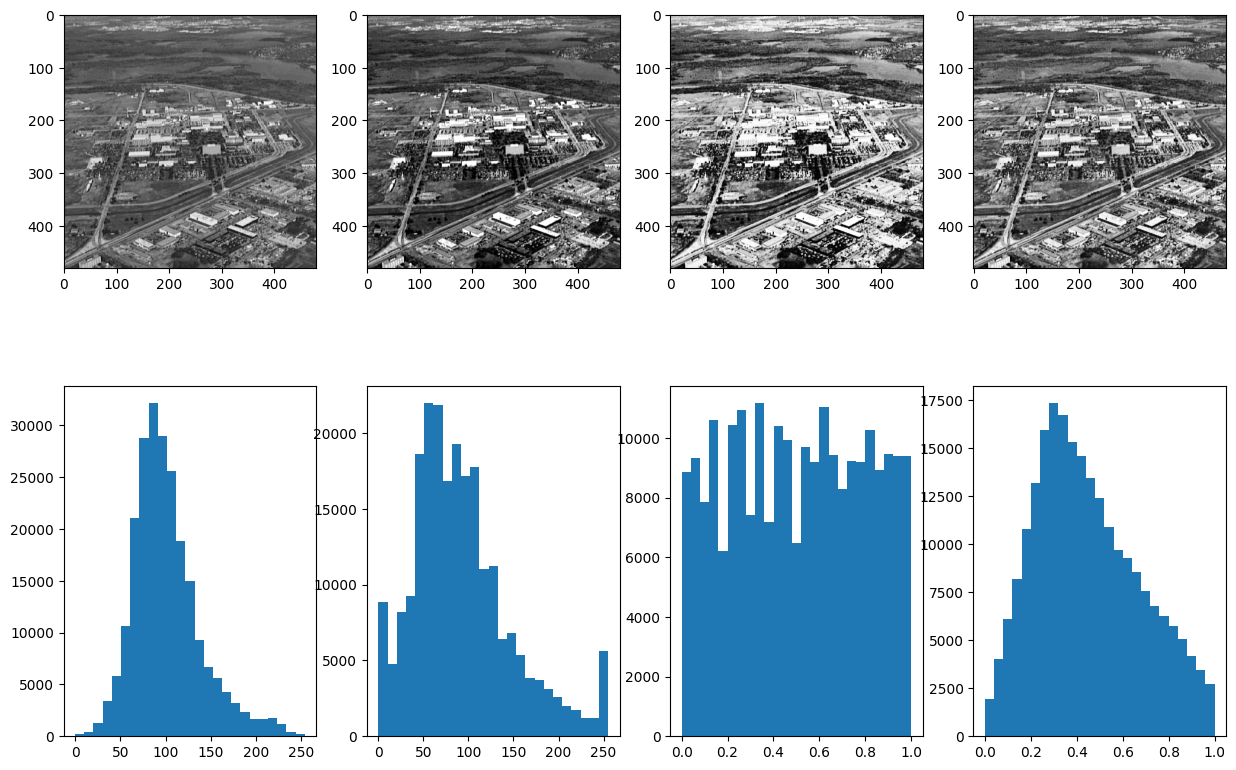

In [75]:
im = io.imread('images/aerial_view.tif')     # read image from disk, provide the correct path 
# contrast stretching 
p2 = np.percentile(im, 2) 
p98 = np.percentile(im, 98) 
img_rescale = exposure.rescale_intensity(im, in_range=(p2, p98))

im_eq = exposure.equalize_hist(im)
im_adapteq = exposure.equalize_adapthist(im)

plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
plt.imshow(im, cmap='gray')

plt.subplot(2,4,2)
plt.imshow(img_rescale, cmap='gray')

plt.subplot(2,4,3)
plt.imshow(im_eq, cmap='gray')

plt.subplot(2,4,4)
plt.imshow(im_adapteq, cmap='gray')

plt.subplot(2,4,5)
plt.hist( im.ravel(),bins=25)
plt.subplot(2,4,6)
plt.hist( img_rescale.ravel(),bins=25)
plt.subplot(2,4,7)
plt.hist( im_eq.ravel(),bins=25)
plt.subplot(2,4,8)
plt.hist( im_adapteq.ravel(),bins=25)

(array([ 2990., 10872.,  8721.,  7947.,  8499.,  9318., 11168., 12499.,
        13727., 15101., 17371., 20533., 23179., 27035., 30189., 32718.,
        36518., 41587., 45847., 52957., 51070., 30195., 27755., 23250.,
        25706.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

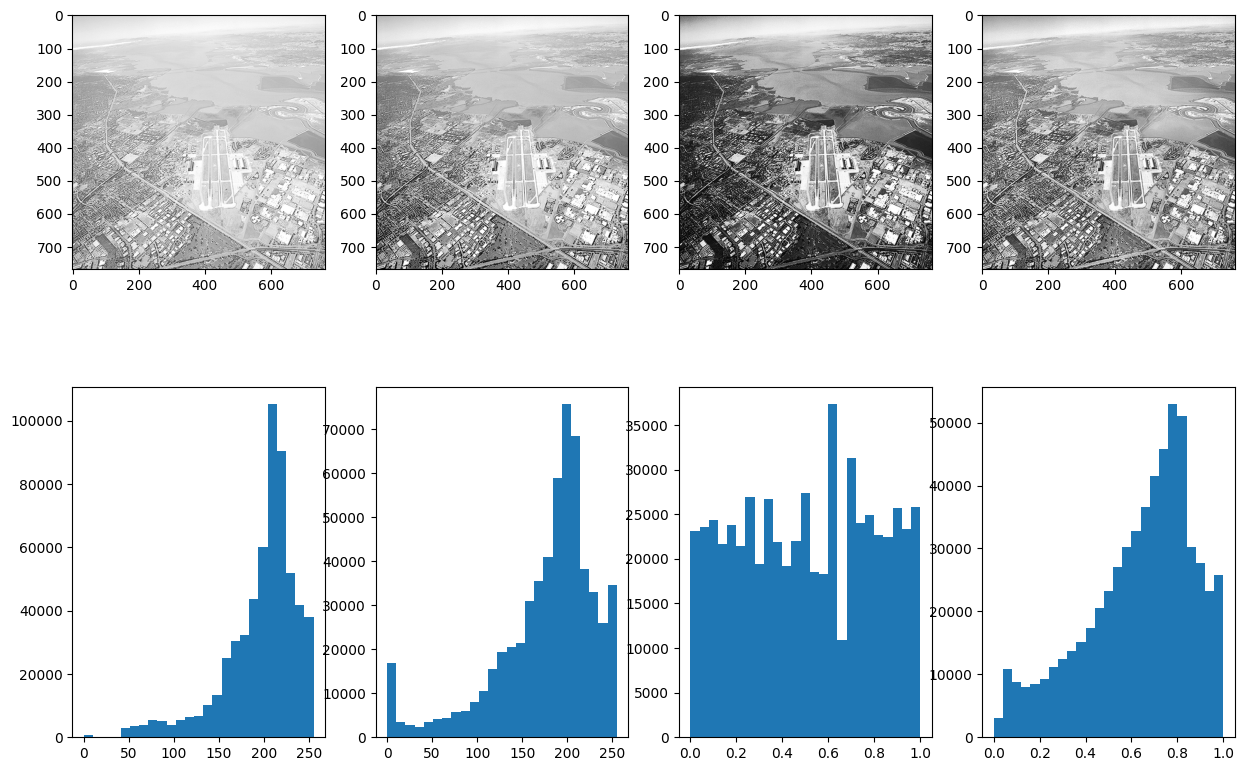

In [76]:
im = io.imread('images/aerialview-washedout.tif')     # read image from disk, provide the correct path 
# contrast stretching 
p2 = np.percentile(im, 2) 
p98 = np.percentile(im, 98) 
img_rescale = exposure.rescale_intensity(im, in_range=(p2, p98))

im_eq = exposure.equalize_hist(im)
im_adapteq = exposure.equalize_adapthist(im)

plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
plt.imshow(im, cmap='gray')

plt.subplot(2,4,2)
plt.imshow(img_rescale, cmap='gray')

plt.subplot(2,4,3)
plt.imshow(im_eq, cmap='gray')

plt.subplot(2,4,4)
plt.imshow(im_adapteq, cmap='gray')

plt.subplot(2,4,5)
plt.hist( im.ravel(),bins=25)
plt.subplot(2,4,6)
plt.hist( img_rescale.ravel(),bins=25)
plt.subplot(2,4,7)
plt.hist( im_eq.ravel(),bins=25)
plt.subplot(2,4,8)
plt.hist( im_adapteq.ravel(),bins=25)

# 4 Spatial Filtering 

Spatial filtering or convolution involves a mask (for example, 3 x 3), consists of an array of values with a center. The mask is placed on the image of interest and translated across all possible pixel positions on the image. A new (filtered) image is produced by replacing the intensity value at the center by a linear combination of the intensity values of the center pixel and all neighboring pixels.

# 4.1 Smoothing with Averaging Filter 

Spatial filters can be used for smoothing to blur and remove noise.  Two popular linear filters are the averaging filter and the Gaussian filter. The averaging filter replaces each pixel with an average of its neighborhood and achieves a smoothing effect.  

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


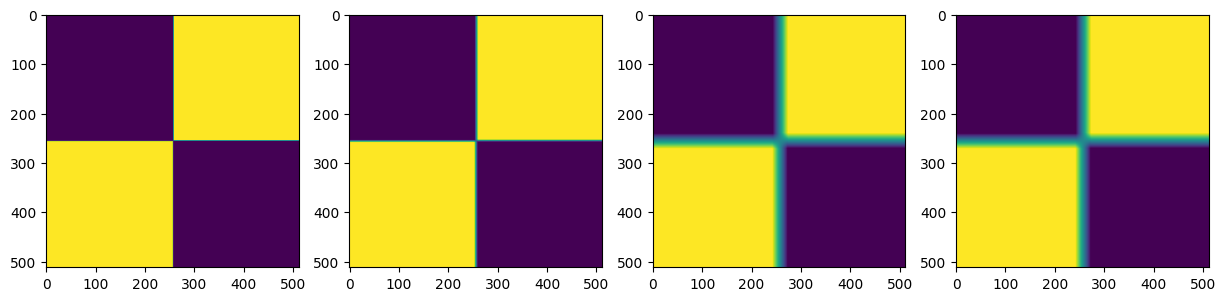

In [47]:
import scipy.ndimage
import numpy as np 
im = io.imread('images/original_test_pattern.tif') 
im = (im - np.amin(im))*255.0 /(np.amax(im)-np.amin(im)) 

# Kernel for averaging 
kernel = np.ones((5,7))
print(kernel)

# Convolution of the image with the kernel: 
# all functions are the same
# smoothes on the edges
imgA1 = scipy.ndimage.convolve(im, kernel) 
imgA2 = scipy.ndimage.convolve(im, np.ones((31,31))) 
imgA3 = scipy.ndimage.uniform_filter(im, size= 31) 

plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im)
plt.subplot(142), 
plt.imshow(imgA1)
plt.subplot(143), 
plt.imshow(imgA2)
plt.subplot(144), 
plt.imshow(imgA3)

# 4.2 Smoothing with Gaussian Filter 
Smoothing operations can also be performed by convolving the same image with a Gaussian filter. Below is example code: 

    imgGaussF = scipy.ndimage.gaussian_filter(im, sigma=7.5)

The parameter `sigma` is the standard deviation of the Gaussian function (which has a mean of 0). Therefore by setting `sigma=7.5`, the code will perform a convolution with a Gaussian kernel of 7.5 pixels.  
1. Smooth the image `original_test_pattern.tif` using a Gaussian filter with `sigma=7.5`. 
2. Smooth the image `original_test_pattern.tif` using a Gaussian filter with `sigma=31`. 
3. Display the results. 

In [52]:
imgGaussF1 = scipy.ndimage.gaussian_filter(im, sigma=2.5)
imgGaussF2 = scipy.ndimage.gaussian_filter(im, sigma=7.5)

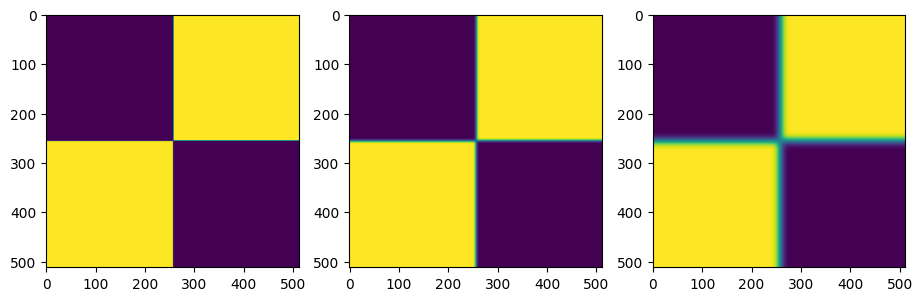

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im)
plt.subplot(142), 
plt.imshow(imgGaussF1)
plt.subplot(143), 
plt.imshow(imgGaussF2)

# 4.3 Edge Filters  

Spatial filtering techniques can be used to compute image gradients (partial derivatives). The code below loads an image `ckt-board-orig.tif` and creates a horizontal and a vertical Prewitt filter. 
1. Convolve the image `im` with a horizontal Prewitt filter (`pkernel_h`). Normalize this result. 
2. Convolve the image `im` with a vertical Prewitt filter (`pkernel_v`). Normalize this result.  
3. Display the original image and the results in a subplot. 

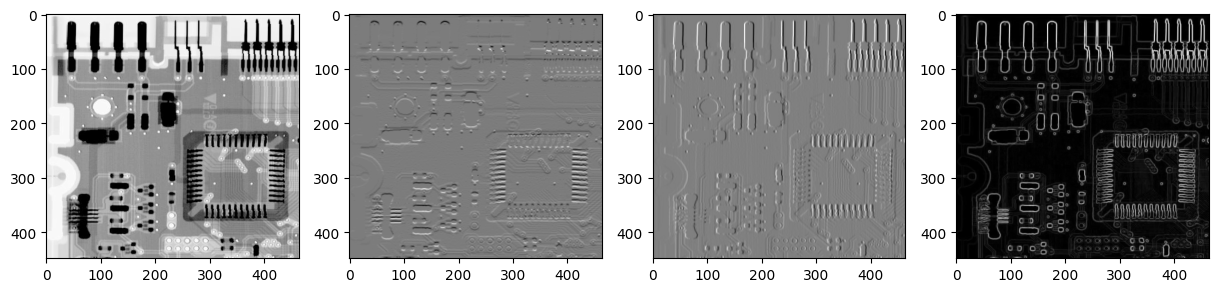

In [78]:
from skimage.filters import prewitt_v, prewitt_h, prewitt

im = io.imread('images/ckt-board-orig.tif')
# normalize the image. 
im = (im - np.amin(im)) /(np.amax(im)-np.amin(im)) 

# horizontal Prewitt filter
pkernel_h = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])
# vertical Prewitt filter
pkernel_v = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                      [-1, 0, 1]])

imgPH = scipy.ndimage.convolve(im, pkernel_h )
imgPV = scipy.ndimage.convolve(im, pkernel_v )

plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im, cmap="gray")
plt.subplot(142), 
plt.imshow(imgPH, cmap="gray")
plt.subplot(143), 
plt.imshow(imgPV, cmap="gray")
plt.subplot(144), 
plt.imshow(np.sqrt(imgPH*imgPH + imgPV*imgPV), cmap="gray")


In [80]:
print(imgPH.min(),imgPH.max()) #therefore squareroot
print(imgPV.min(),imgPV.max())

-2.6 2.7450980392156863
-2.9019607843137254 2.8980392156862744


 The code below implements edge filtering with build in functions. 

(-0.5, 463.5, 447.5, -0.5)

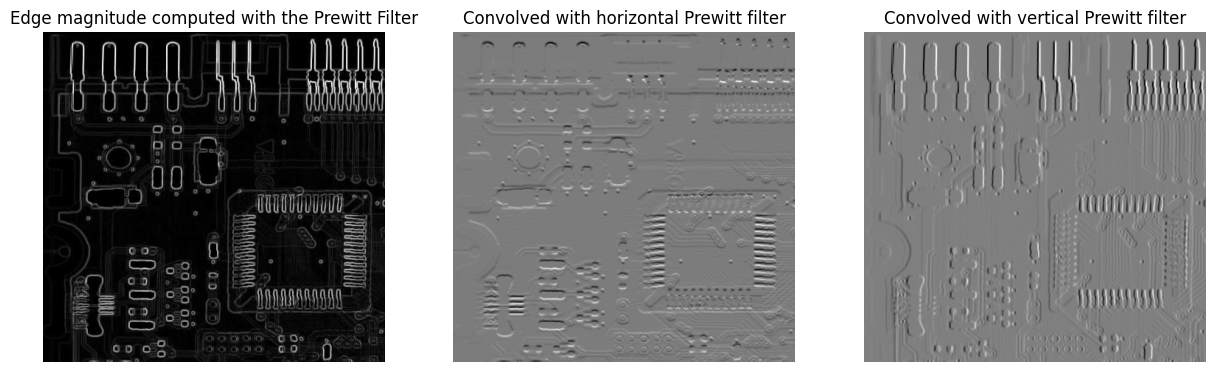

In [56]:
# out of the box edge detector
# horizontal edge filtering
edge_prewitt_h = prewitt_h(im)
# vertical  edge filtering
edge_prewitt_v = prewitt_v(im)
# computer edge magnitude 
edge_prewitt = prewitt(im)

plt.figure(figsize=(15,10))
plt.subplot(234), 
plt.imshow(edge_prewitt, cmap='gray')
plt.title('Edge magnitude computed with the Prewitt Filter')
plt.axis('off')
plt.subplot(235), 
plt.imshow(edge_prewitt_h, cmap='gray')
plt.title('Convolved with horizontal Prewitt filter')
plt.axis('off')
plt.subplot(236), 
plt.imshow(edge_prewitt_v, cmap='gray')
plt.title('Convolved with vertical Prewitt filter')
plt.axis('off')


# 4.4 Sharpening with Laplacian Filter 
The following code implements a Laplacian filter for sharpening an image. 

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


C:\Users\tobi1\AppData\Local\Temp\ipykernel_13420\2575902003.py:12: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Lap = scipy.ndimage.filters.convolve(A0, kernel)


(-0.5, 689.5, 799.5, -0.5)

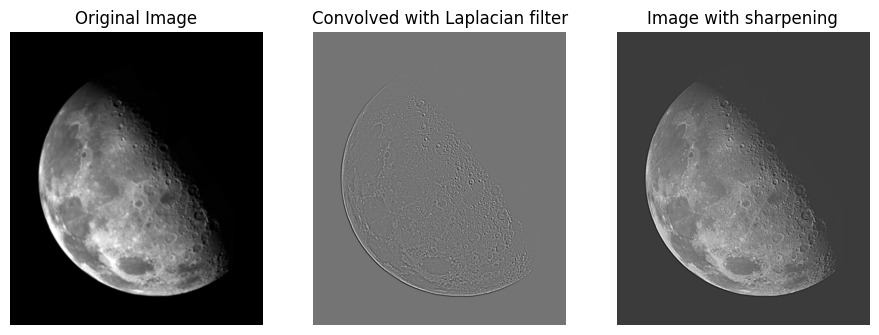

In [81]:
A0 = io.imread('images/moon.tif')

# Map values to the (0, 255) range: 
A0 = (A0 - np.amin(A0))*255.0 /(np.amax(A0)-np.amin(A0)) 

# Kernel for Laplacian: 
kernel = np.ones((3,3))*(-1) 
kernel[1,1] = 8  

print(kernel)
# Convolution of the image with the kernel: 
Lap = scipy.ndimage.filters.convolve(A0, kernel) 
plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(A0, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(142), 
plt.imshow(Lap, cmap='gray')
plt.title('Convolved with Laplacian filter')
plt.axis('off')
plt.subplot(143), 
plt.imshow(A0+Lap, cmap='gray')
plt.title('Image with sharpening')
plt.axis('off')

# Advanced Level 
# 5. Denoising an image

The following code shows you can add noise to your images. Try the following   

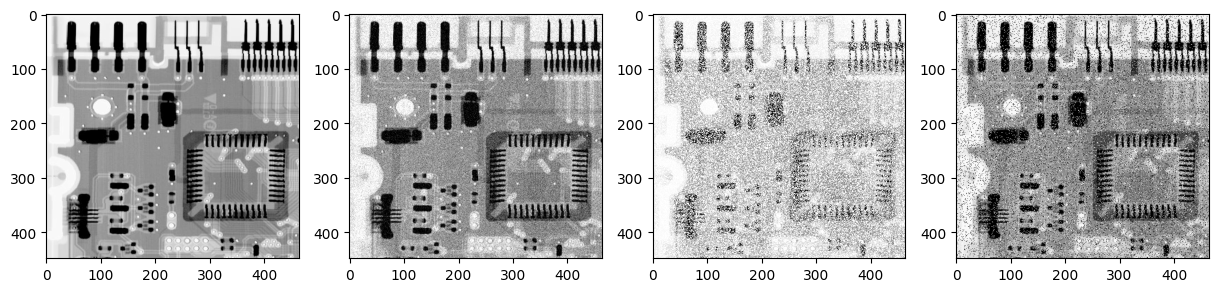

In [82]:
from skimage.morphology import disk 
from skimage.filters import median 
from skimage.util import random_noise, img_as_float

seed = 42
im = io.imread('images/ckt-board-orig.tif')
# adding "salt" noise
im_noisy_s = random_noise(im, seed=seed, mode='gaussian') #bluring
im_noisy_s2 = random_noise(im, seed=seed, mode='salt', amount=0.5) #ome pixels set to white
im_noisy_sp = random_noise(im, seed=seed, mode='s&p', amount=0.15) #some pixels set to white others to black
plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im, cmap='gray')
plt.subplot(142), 
plt.imshow(im_noisy_s, cmap='gray')
plt.subplot(143), 
plt.imshow(im_noisy_s2, cmap='gray')
plt.subplot(144), 
plt.imshow(im_noisy_sp, cmap='gray')

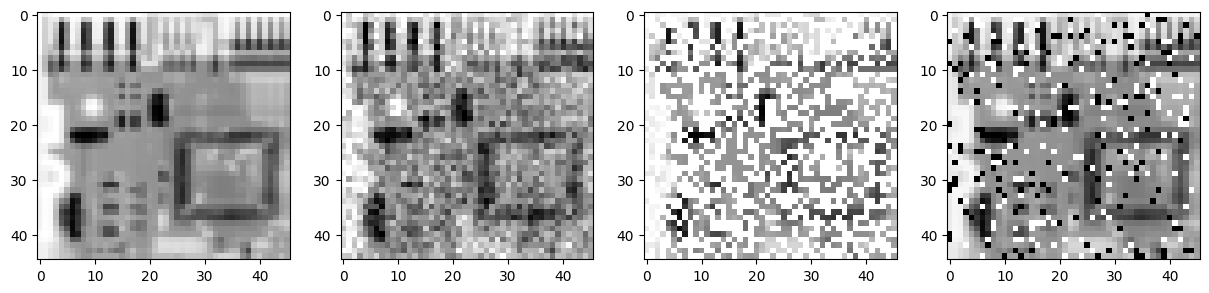

In [83]:
# rescale the image


from skimage.morphology import disk 
from skimage.filters import median 
from skimage.util import random_noise, img_as_float
from skimage.transform import rescale

seed = 42
im = io.imread('images/ckt-board-orig.tif')

im =rescale (im, 0.10)

# adding "salt" noise
im_noisy_s = random_noise(im, seed=seed, mode='gaussian')
im_noisy_s2 = random_noise(im, seed=seed, mode='salt', amount=0.5)
im_noisy_sp = random_noise(im, seed=seed, mode='s&p', amount=0.15)
plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im, cmap='gray')
plt.subplot(142), 
plt.imshow(im_noisy_s, cmap='gray')
plt.subplot(143), 
plt.imshow(im_noisy_s2, cmap='gray')
plt.subplot(144), 
plt.imshow(im_noisy_sp, cmap='gray')

Denoise the image (im_noisy_sp) with the following filters and compare the performace. 
1. Averaging Filter (3 by 3 kernel)
2. Gaussian Filter (sigma = 1.5)
3. Median Filter. (3 by 3 kernel or disk(5)) (e.g `medImage = median(im_noisy_sp, disk(5))` or  `medImage = median(im_noisy_sp, square(3))`)
4. Increase the kernel size for each filter 
5. Display images for your results in a subplot. 

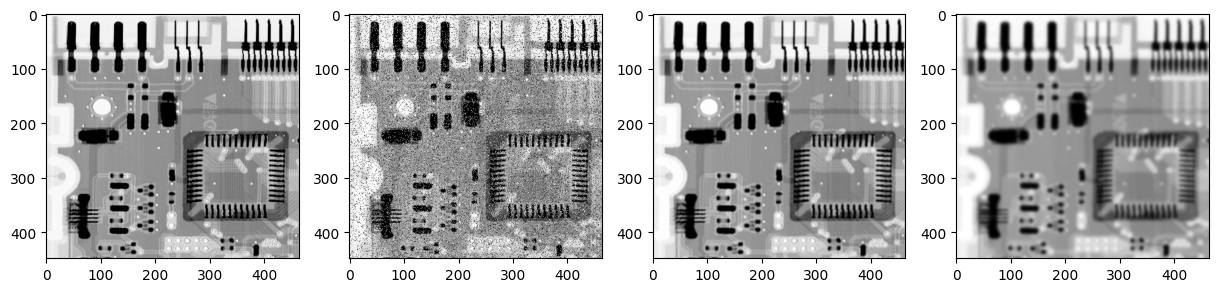

In [86]:
from skimage.morphology import disk 
from skimage.filters import median 



im_noisy_sp = random_noise(im, seed=seed, mode='s&p', amount=0.15)
im_AVE = scipy.ndimage.convolve(im, np.ones((3,3)))  # Info bigger kernel means more smoothing 
im_GaussF1 = scipy.ndimage.gaussian_filter(im, sigma=2.5)

plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im, cmap='gray')
plt.subplot(142), 
plt.imshow(im_noisy_sp, cmap='gray')
plt.subplot(143), 
plt.imshow(im_AVE, cmap='gray')
plt.subplot(144), 
plt.imshow(im_GaussF1, cmap='gray')

# 6. Your own contrast-stretching intensity transformation
You can create your own contrast-stretching intensity transformation. Below is an equation that performs intensity transformation. The value of the transformation given by m and the steepness of the transformation is given by E. 
1. Create a function that does a contrast stretching transformation for different values of `m` and `E`. (i.e. the input of your function is the image (`im`), the variable `m` and the variable `E`)
2. Apply the function with different values of `m` and `E` to the image `spectrum.tif`. 


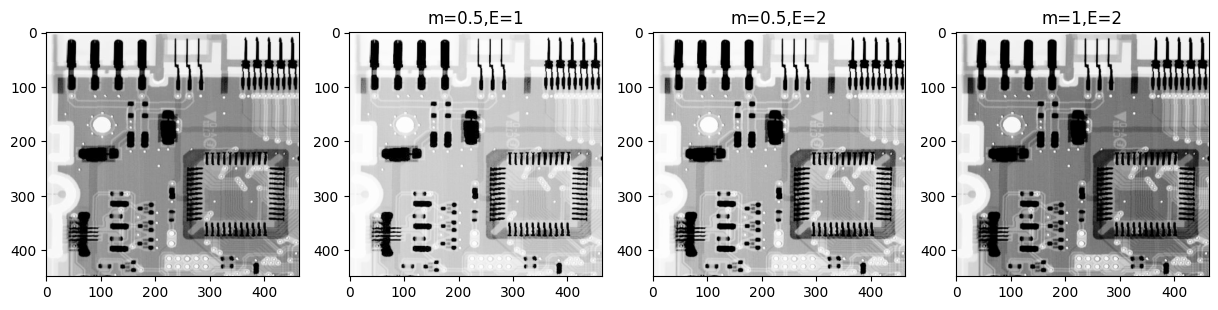

In [85]:


# create own contrast stretching function
# m = 0.5;
# E = 0.5;
# g = 1/(1+(m/(im + np.finfo(float).eps))**E)

def function_contrast_stretching(img,m,E):
    return 1/(1+(m/(im + np.finfo(float).eps))**E)


im = io.imread('images/ckt-board-orig.tif')

# needed to transfor float [0-1]
im = (im - np.amin(im)) /(np.amax(im)-np.amin(im)) 

plt.figure(figsize=(15,5))
plt.subplot(141), 
plt.imshow(im, cmap='gray')
plt.subplot(142), 
plt.title("m=0.5,E=1")
plt.imshow(function_contrast_stretching(im,m=0.5,E=1), cmap='gray')
plt.subplot(143), 
plt.title("m=0.5,E=2")
plt.imshow(function_contrast_stretching(im,m=0.5,E=2), cmap='gray')
plt.subplot(144), 
plt.title("m=1,E=2")
plt.imshow(function_contrast_stretching(im,m=1,E=2), cmap='gray')

# 7. Image Pyramids 

The pyramid_gaussian function takes an image and yields successive images shrunk by a constant scale factor. Image pyramids are often used, e.g., to implement algorithms for denoising, texture discrimination, and scale- invariant detection.

The following code constructs the Gaussian pyramid of an image by starting with the original image and creating smaller images iteratively, first by smoothing (with a Gaussian filter to avoid antialiasing), and then by subsampling (collectively called reducing) from the previous level's image at each iteration until a minimum resolution is reached. 

The image pyramid created in this way is called a Gaussian pyramid. These are good for searching over scale (for instance, template-matching), precomputation, and image processing tasks by editing frequency bands separately (for instance, image blending). Similarly, a Laplacian pyramid for the image can be constructed by starting from the smallest sized image in the Gaussian pyramid and then by expanding (up-sampling plus smoothing) the image from that level and subtracting it from the image from the next level of the Gaussian pyramid, and repeating this process iteratively until the original image size is reached. 
1. Comment the following code. Add a one line comment where you see '#your comment goes here' 

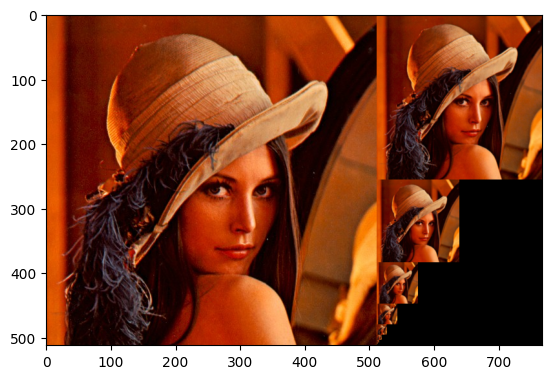

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io, color
from skimage.transform import pyramid_gaussian
%matplotlib inline

# your comment goes here 
# load a color image
im = io.imread('images/lenna-RGB.tif')     

# your comment goes here 
# extract the image dimensions (hight, width channels)
rows, cols, dim = im.shape

# your comment goes here :
# creates images in a gaussian pyramid from input image, downscaled images with gaussian 
# filter before resizing of 2 at each step
# The channel axis (axis which is the color dimension) is 2
# 
pyramid = tuple(pyramid_gaussian(im, downscale=2, channel_axis=2))

# your comment goes here 
# creates an array of zeros with the same number of rows as the original image
# and 1.5 of the original number of columns
composite_image = np.zeros((rows, np.int32(cols + cols / 2) , 3))

# your comment goes here 
# Insert the original image in the left of the composite image
composite_image[:rows, :cols, :] = pyramid[0]

# your comment goes here 
# recursively add each downsampled image on the right side
# each image at the next pyramid level is added below the previous level
# 
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

plt.imshow(composite_image)
plt.show()

The code below constructs a Laplacian image pyramid and displays the image pyramid.  

In [ ]:
# laplacing = upscaling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


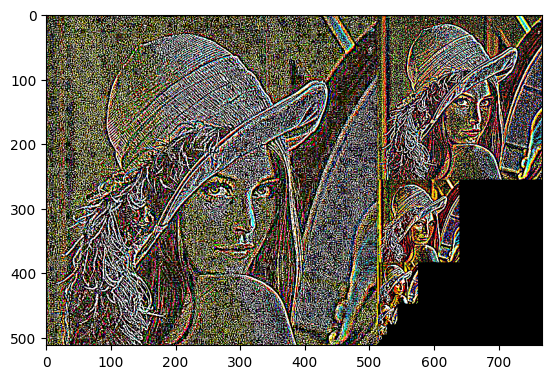

In [65]:
from skimage.transform import pyramid_laplacian

im = io.imread('images/lenna-RGB.tif')     # read image from disk, provide the correct path 
im = im.astype(float)
im = (im - im.min()/(im.max() - im.min()))
# find the height, weight and number of channels in the image 
rows, cols, dim = im.shape

# Creates images of the Laplacian pyramid formed by the input image.
pyramid = tuple(pyramid_laplacian(im, downscale=2,channel_axis=2))

# Create an array of zeros with the same number of rows, 1.5 x the original number of coloumns
composite_image = np.zeros((rows, np.int32(cols + cols / 2) , 3))

# insert the original image in the left on the composite image 
composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

plt.imshow(composite_image)
plt.show()

# 8. Calculating shape/region properties of objects  
In a binary image, sets of white pixels which are connected to each other are called connected components or objects. 
The function 'label' from skimage.measure can be used to connect all the connected components. The function 'label2rgb' can be 

Text(0.5, 1.0, 'Labeled Objects')

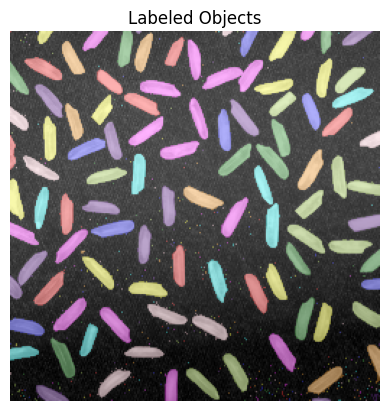

In [66]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import math

im = io.imread('images/rice.png')     # read image from disk, provide the correct path 
im = im.astype(float)
im = im-im.min()
im = im/im.max()
block_size = 55
imbw = im > filters.threshold_local(im, block_size, method = 'mean')

label_img = label(imbw)
image_label_overlay = label2rgb(label_img, image=im)

# display in many colors 
plt.figure()
plt.imshow(image_label_overlay)
plt.axis('off')
plt.title('Labeled Objects')

We can calculate shape or region properties of these objects. Once the image has been labeled, use the regionprops command to obtain quantitative information about the objects. Regionprops properties include the image centroid, area, major_axis_length and minor_axis_length and many other properties. 

1. Create a figure to display the image
2. Plot the centriod coordintes 
3. Display a histogram of the size (area) of each blob
4. You will find a lot of small blobs (objects with an area size of less than 50) which are image noise. Can you remove those small blobs? 


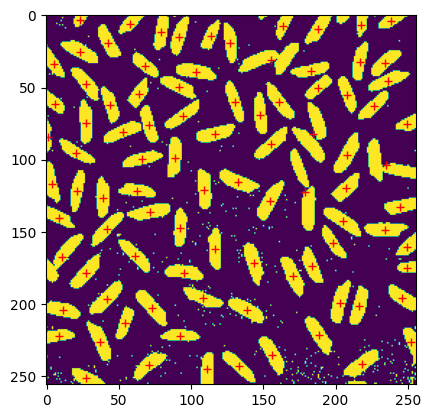

In [90]:
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

regions = regionprops(label_img)

plt.figure()
plt.imshow(imbw)
for props in regions:
    if (props.area > 50): #removes noise (histograms with higher values)
        y0, x0 = props.centroid
        plt.plot(x0, y0, "r+")

(array([304.,   2.,   1.,   2.,   1.,   1.,   1.,   6.,   6.,   5.,  13.,
         20.,  15.,  16.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   2.,   1.]),
 array([  1.  ,  18.72,  36.44,  54.16,  71.88,  89.6 , 107.32, 125.04,
        142.76, 160.48, 178.2 , 195.92, 213.64, 231.36, 249.08, 266.8 ,
        284.52, 302.24, 319.96, 337.68, 355.4 , 373.12, 390.84, 408.56,
        426.28, 444.  ]),
 <BarContainer object of 25 artists>)

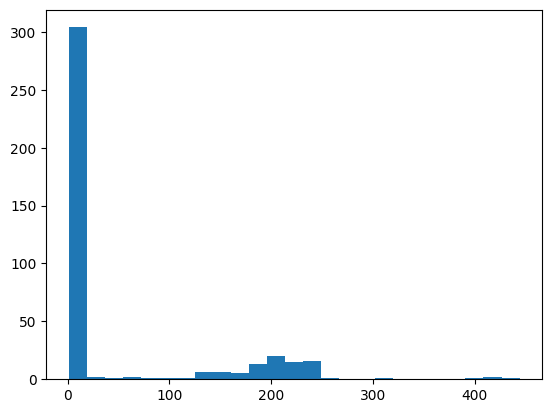

In [89]:
areas = [r.area for r in regions] #histograms of areas
plt.figure()
plt.hist(areas, bins=25)

In [ ]:
# many small pixel groups (around 0) -> these are the actual rice 

In [93]:
# from skimage import morphology

# imbw_rp = morphology.remove_small_objects(imbw,50)

# regions = regionprops(imbw_rp)

# plt.figure()
# plt.imshow(imbw)
# for props in regions:
#     y0, x0 = props.centroid
#     plt.plot(x0, y0, "r+") 